In [0]:
# Desafio OP Data Science
# Author: Orlando Burli
# Created: 11/03/2020
# Instructions:
#    For execute, you can upload on codelab this script, and the upload the renttherunway_final_data.json, sended along 
#    for this challenge. Remember to correct the path in the line 12, and the run all the codes to see the challenge result.

# Setup for all analises
import pandas as pd
import numpy as np

data = pd.read_json('/content/drive/My Drive/renttherunway_final_data.json', lines = True)

df = pd.DataFrame(data)

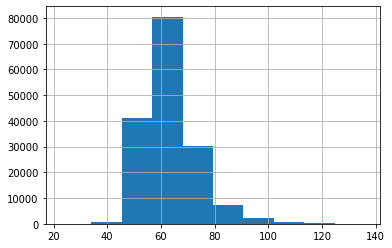

In [0]:
# Desafio 1: Produza, programaticamente, um gráfico da distribuição de peso (histograma) dos clientes (em Kg),
# desconsiderando os pontos de dados que não têm informação sobre o peso;

# Passo 1: Calcular o peso em Kg, a partir das libras
def calculate_weigth_in_kg(pounds):
  pd = str(pounds).replace('lbs', '')
  return float(pd) / 2.205 if pd.isnumeric() else -1

df["weight"]
df["weight_in_kg"] = df.apply(lambda row: calculate_weigth_in_kg(row['weight']), axis=1)

# Passo 2: Filtrar somente quem possui o peso corretamente tratado na base
df2 = df[df["weight_in_kg"] > 0]

# Passo 3: Apresentar os dados, em 10 faixas
df2["weight_in_kg"].hist(bins=10)

In [0]:
## Desafio 2: Qual razão de aluguel (“rented for”) tem o maior número absoluto de “fits”? Quantos “fits” são para esta razão de aluguel?
gp1 = df[df["fit"] == "fit"].groupby(["rented for"]).size().sort_values(ascending=False).to_frame('total_reasons').reset_index()

rented_for = gp1['rented for'].values[0]
fits_number = gp1['total_reasons'].values[0]

print(f'A razão de aluguel "{rented_for}" é a com maior número absoluto, sendo {fits_number}.')

A razão de aluguel "wedding" é a com maior número absoluto, sendo 43111.


In [0]:
## Desafio 3: Qual razão de aluguel (“rented for”) tem o maior número relativo de “fits”? Qual é o percentual de “fits” para esta razão de aluguel?
gp2 = df[df["fit"] == "fit"].groupby(["rented for"]).size().sort_values(ascending=False).to_frame('total_reasons').reset_index()

total_reasons_fit = gp2['total_reasons'].sum()

gp2["percentage"] = gp2.apply(lambda row: row["total_reasons"] / total_reasons_fit, axis=1)

gp2 = gp2.sort_values(by='percentage', ascending=False)

rented_for = gp2['rented for'].values[0]
percentage = gp2['percentage'].values[0]

print(f'A razão de aluguel "{rented_for}" é a com maior número relativo, sendo sua participação de {percentage*100:1.2f}%.')


A razão de aluguel "wedding" é a com maior número relativo, sendo sua participação de 30.35%.


In [0]:
## Desafio 4: Produza uma estatística de palavras mais usadas nas avaliações (“review_text”);

words = df["review_text"].str.lower().to_frame()
words.rename(columns={'review_text':'word'}, inplace=True)
words = words["word"].str.split().to_frame().explode('word').groupby(by='word').size().sort_values(ascending=False).to_frame('total_word').reset_index()

# Coleção de pronomes e preposições, para melhor análise das palavras
pronouns = ['all', 'another', 'any', 'anybody', 'anyone', 'anything', 'as', 'aught', 'both', 'each', 'each other', 'either', 'enough', 'everybody', 'everyone', 'everything', 'few', 'he', 'her', 'hers', 'herself', 'him', 'himself', 'his', 'I', 'idem', 'it', 'its', 'itself', 'many', 'me', 'mine', 'most', 'my', 'myself', 'naught', 'neither', 'no one', 'nobody', 'none', 'nothing', 'nought', 'one', 'one another', 'other', 'others', 'ought', 'our', 'ours', 'ourself', 'ourselves', 'several', 'she', 'some', 'somebody', 'someone', 'something', 'somewhat', 'such', 'suchlike', 'that', 'thee', 'their', 'theirs', 'theirself', 'theirselves', 'them', 'themself', 'themselves', 'there', 'these', 'they', 'thine', 'this', 'those', 'thou', 'thy', 'thyself', 'us', 'we', 'what', 'whatever', 'whatnot', 'whatsoever', 'whence', 'where', 'whereby', 'wherefrom', 'wherein', 'whereinto', 'whereof', 'whereon', 'wherever', 'wheresoever', 'whereto', 'whereunto', 'wherewith', 'wherewithal', 'whether', 'which', 'whichever', 'whichsoever', 'who', 'whoever', 'whom', 'whomever', 'whomso', 'whomsoever', 'whose', 'whosever', 'whosesoever', 'whoso', 'whosoever', 'ye', 'yon', 'yonder', 'you', 'your', 'yours', 'yourself', 'yourselves']
preposition = ['aboard', 'about', 'above', 'absent', 'across', 'after', 'against', 'along', 'alongside', 'amid', 'among', 'amongst', 'anti', 'around', 'as', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'besides', 'between', 'beyond', 'but', 'by', 'circa', 'concerning', 'considering', 'despite', 'down', 'during', 'except', 'excepting', 'excluding', 'failing', 'following', 'for', 'from', 'given', 'in', 'inside', 'into', 'like', 'minus', 'near', 'of', 'off', 'on', 'onto', 'opposite', 'outside', 'over', 'past', 'per', 'plus', 'regarding', 'round', 'save', 'since', 'than', 'through', 'to', 'toward', 'towards', 'under', 'underneath', 'unlike', 'until', 'up', 'upon', 'versus', 'via', 'with', 'within', 'without', 'worth']

# Colunas indicando se as palavras são pronomes ou artigos
words["pronoun"] = words.apply(lambda row: row['word'] in pronouns, axis=1)
words["preposition"] = words.apply(lambda row: row['word'] in preposition, axis=1)

# Funções de filtro
is_pronoun = words['pronoun']
is_preposition = words['preposition']

# Totais
count_words = words['word'].count()
count_pronouns = words[is_pronoun]['word'].count()
count_preposition = words[is_preposition]['word'].count()

total_words = words['total_word'].sum()
total_pronouns = words[is_pronoun]['total_word'].sum()
total_preposition = words[is_preposition]['total_word'].sum()

percent_pronouns = total_pronouns / total_words
percent_preposition = total_preposition / total_words

# Colunas percentuais
words['percent'] = words.apply(lambda row: row['total_word'] / total_words, axis=1)

top_word = words['word'].values[0]
top_word_total = words['total_word'].values[0]
top_word_percent = words['percent'].values[0]

print(f'Temos um total de {count_words:,} palavras, das quais {count_preposition:,} são preposições e {count_pronouns:,} são pronomes, equivalentes a {percent_preposition:1.2f}% e {percent_pronouns:1.2f}%, respectivamente.')

print(f'A palavra mais citada é "{top_word}", com {top_word_total:,} citações, equivalente a {top_word_percent:1.2f}% do total.')


Temos um total de 107,167 palavras, das quais 75 são preposições e 84 são pronomes, equivalentes a 0.12% e 0.10%, respectivamente.
A palavra mais citada é "the", com 642,910 citações, equivalente a 0.06% do total.


In [187]:
# Desafio 5: Que outra estatística ou insight você poderia extrair destes dados?

# Aqui iremos analisar, por tipo de corpo, o percentual de roupas que são para clientes "fora de forma".
# Tal informação servirá de base para decisão para qual é o padrão de cliente atendido pela empresa de aluguéis.

gp_fit = df[df["fit"] != "fit"].groupby(["body type"]).size().sort_values(ascending=False).to_frame('total_fit').reset_index()

gp_not_fit = df[df["fit"] == "fit"].groupby(["body type"]).size().sort_values(ascending=False).to_frame('total_not_fit').reset_index()

gp_body = pd.merge(gp_fit, gp_not_fit)

gp_body["total"] = gp_body.apply(lambda row: row['total_fit'] + row['total_not_fit'], axis=1)
gp_body["percent_not_fit"] = gp_body.apply(lambda row: row['total_not_fit'] / row['total'], axis=1)

def message_body(body_type, percent_not_fit):
  return f'O cliente com o corpo "{body_type}" é considerado fora de forma em {percent_not_fit * 100:1.2f}% dos casos.'

gp_body["message"] = gp_body.apply(lambda row: message_body(row['body type'], row['percent_not_fit']), axis=1)

gp_body = gp_body.sort_values(ascending=False,by='percent_not_fit')

messages = gp_body['message'].to_numpy()

for m in np.nditer(messages, ['refs_ok']):
  print(m)


O cliente com o corpo "straight & narrow" é considerado fora de forma em 74.60% dos casos.
O cliente com o corpo "athletic" é considerado fora de forma em 74.33% dos casos.
O cliente com o corpo "petite" é considerado fora de forma em 74.31% dos casos.
O cliente com o corpo "hourglass" é considerado fora de forma em 73.82% dos casos.
O cliente com o corpo "pear" é considerado fora de forma em 72.90% dos casos.
O cliente com o corpo "full bust" é considerado fora de forma em 71.80% dos casos.
O cliente com o corpo "apple" é considerado fora de forma em 71.50% dos casos.
